In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, jaccard_score, log_loss, f1_score

In [2]:
df =  pd.read_csv('C:/Users/arzum/OneDrive/Belgeler/GitHub/Ada-Lovelace-Academy/exercises/data/diabetes/diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

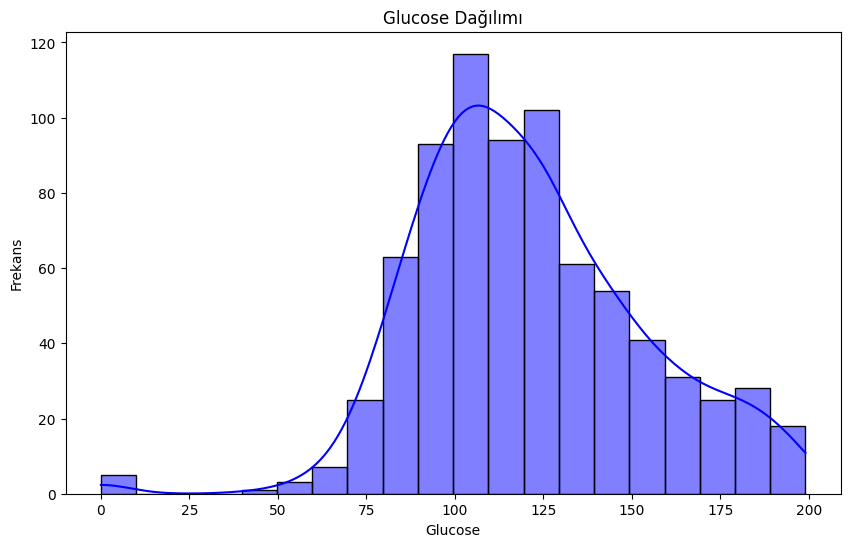

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Glucose'], bins=20, kde=True, color='blue')
plt.title('Glucose Dağılımı')
plt.xlabel('Glucose')
plt.ylabel('Frekans')
plt.show()

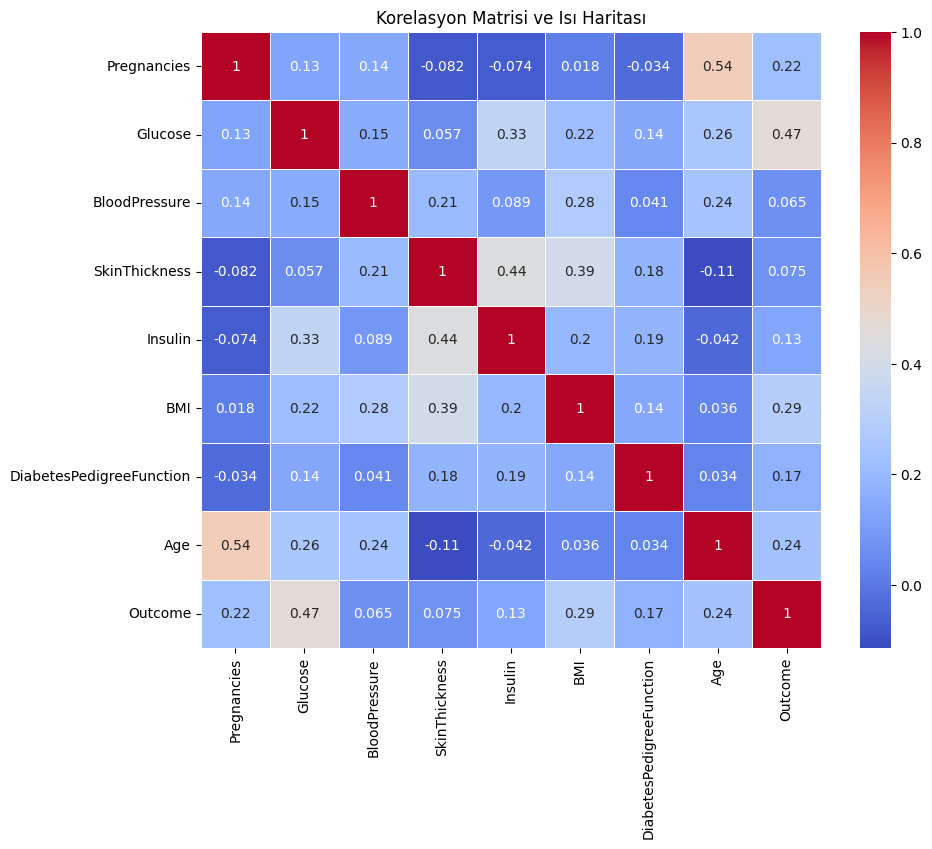

In [8]:
# Korelasyon Matrisi ve Isı Haritası 
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Korelasyon Matrisi ve Isı Haritası')
plt.show()

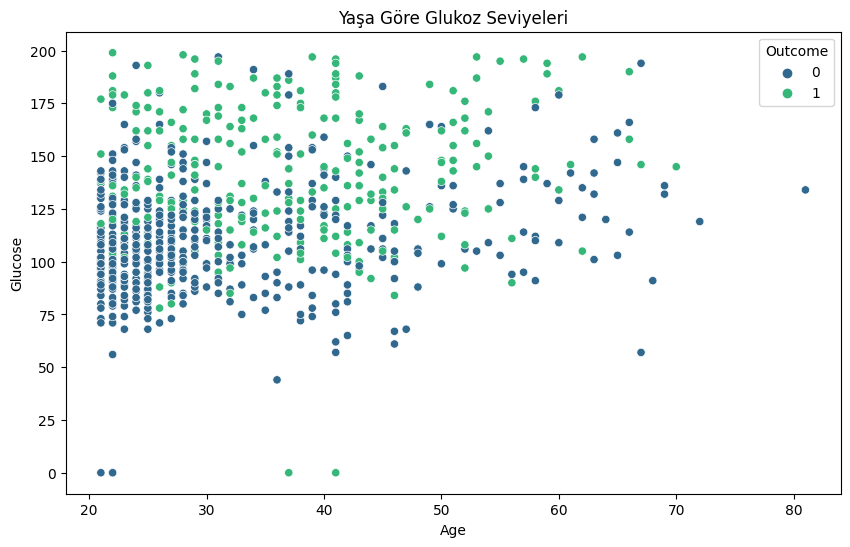

In [9]:
# Yaşa Göre Glukoz Seviyeleri 
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Glucose', data=df, hue='Outcome', palette='viridis')
plt.title('Yaşa Göre Glukoz Seviyeleri')
plt.xlabel('Age')
plt.ylabel('Glucose')
plt.show()

In [10]:
X = df.drop('Outcome', axis=1)  # Outcome sütununu çıkart
y = df['Outcome']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (614, 8) (614,)
Test set: (154, 8) (154,)


In [12]:
# K-NN modelini oluşturma
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

In [13]:
# Jaccard index
jaccard_index = jaccard_score(y_test, y_pred)

# Log loss
y_pred_proba = knn_model.predict_proba(X_test)
logloss = log_loss(y_test, y_pred_proba)

# F1-score
f1 = f1_score(y_test, y_pred)


In [16]:
# Modelin performans değerlendirilmesi
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Acc: {accuracy}")
print(f"Jaccard Index: {jaccard_index}")
print(f"Log Loss: {logloss}")
print(f"F1-Score: {f1}")


Acc: 0.6493506493506493
Jaccard Index: 0.39325842696629215
Log Loss: 3.8995468482815356
F1-Score: 0.5645161290322581
